# Linear simple Regression

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('HousePrice.csv')
df.head(10)


,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33
5,70,2,True,True,False,North Program Organization,2.050000e+09,68333.33
6,87,2,True,True,True,Pardis,6.000000e+08,20000.00
7,59,1,True,True,True,Shahran,2.150000e+09,71666.67
8,54,2,True,True,False,Andisheh,4.930000e+08,16433.33
9,71,1,True,True,True,West Ferdows Boulevard,2.370000e+09,79000.00


In [3]:
print(df.shape)
print(f'The Dataset Describtion is:\n{df.describe}')
print(df.mean)
print(df.dtypes)
print(df.columns)

(3479, 8)
The Dataset Describtion is:
<bound method NDFrame.describe of      Area  Room  Parking  Warehouse  Elevator             Address  \
0      63     1     True       True      True             Shahran   
1      60     1     True       True      True             Shahran   
2      79     2     True       True      True              Pardis   
3      95     2     True       True      True       Shahrake Qods   
4     123     2     True       True      True      Shahrake Gharb   
...   ...   ...      ...        ...       ...                 ...   
3474   86     2     True       True      True  Southern Janatabad   
3475   83     2     True       True      True            Niavaran   
3476   75     2    False      False     False              Parand   
3477  105     2     True       True      True              Dorous   
3478   82     2    False       True      True              Parand   

             Price  Price(USD)  
0     1.850000e+09    61666.67  
1     1.850000e+09    61666.67  


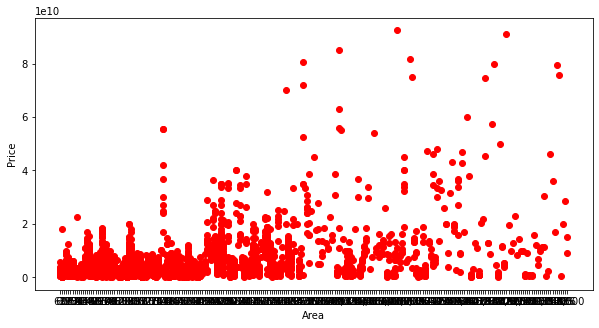

In [4]:
plt.figure(figsize=(10,5))
plt.scatter(df.Area , df.Price, color='red')
plt.xlabel('Area')
plt.ylabel("Price")
plt.show()

In [5]:
df['Area'] = df['Area'].replace([' ',','],'',regex=True)


In [6]:
df= df.dropna(subset='Area')
df['Area'] = df['Area'].astype(float)

In [7]:
df = df[df['Area'] < 1000]

In [8]:
msk = np.random.rand(len(df))<= 0.8
train = df[msk]
test = df[~msk]

In [9]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['Area']])
train_y = np.asanyarray(train[['Price']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[80772154.83050568]]
Intercept:  [-3.32761478e+09]


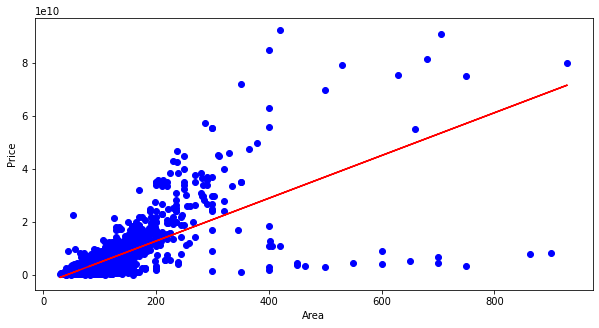

In [10]:
plt.figure(figsize=(10,5))
plt.scatter(train.Area , train.Price, color='blue')
plt.plot(train_x , train_x * regr.coef_[0][0] + regr.intercept_[0],'r')
plt.xlabel('Area')
plt.ylabel("Price")
plt.show()

In [11]:
from sklearn.metrics import r2_score
y_hat= regr.predict(test[['Area']])
x = np.asanyarray(test[['Area']])
y = np.asanyarray(test[['Price']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

print('Variance score: %.2f' % regr.score(x, y))

Residual sum of squares: 30453806334155378688.00
Variance score: 0.56


C:\Users\Saman\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


# linear Multiple Regression

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Address'] = le.fit_transform(df['Address'])
# df['Address'] = pd.to_numeric(df['Address'], errors='coerce')
df['Parking'] = df['Parking'].astype(int)

df['Warehouse'] = df['Warehouse'].astype(int)
# df['Warehouse'] = le.fit_transform(df['Warehouse'])

df['Elevator'] = df['Elevator'].astype(int)

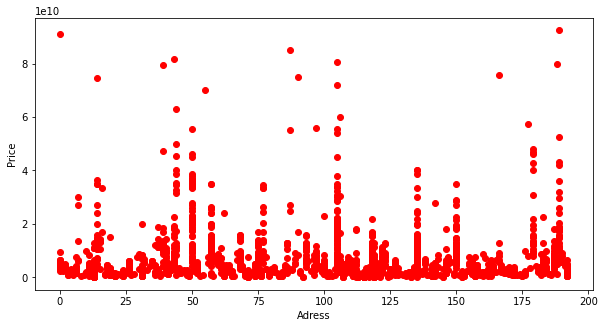

In [13]:
plt.figure(figsize=(10,5))
# list1 = ['Area','Room','Parking','Warehouse','Elevator','Address']
plt.scatter(df.Address, df.Price, color='red')
plt.xlabel('Adress')
plt.ylabel("Price")
plt.show()

In [14]:
msk = np.random.rand(len(df))<= 0.8
train = df[msk]
test = df[~msk]

In [15]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['Address','Room','Parking','Warehouse','Elevator']])
y = np.asanyarray(train[['Price']])
regr.fit(x, y)

print ('Coefficients: ', regr.coef_)
print ('intercept: ', regr.intercept_)

Coefficients:  [[-6.10062978e+06  5.57942247e+09  6.42050557e+08  6.59858630e+08
   2.36262419e+08]]
intercept:  [-7.0341553e+09]


In [16]:
y_hat= regr.predict(test[['Address','Room','Parking','Warehouse','Elevator']])
x = np.asanyarray(test[['Address','Room','Parking','Warehouse','Elevator']])
y = np.asanyarray(test[['Price']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

Residual sum of squares: 62745625857771954176.00
Variance score: 0.32


C:\Users\Saman\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


### Linear Regression Model isnt Good for this Project Because of their bad Predict that shows in Variance score